In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Birkhoff_TSP import *
from scipy.optimize import linear_sum_assignment
from collections import OrderedDict

Using cuda device


In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
num_terms = 30
n_terms = num_terms
lr = 0.01

In [47]:
train_curve_1 = np.load(f"train/train_curve_0.1_{num_terms}_pgd_random.npy")
train_curve_2 = np.load(f"train/train_curve_0.05_{num_terms}_pgd_random.npy")
train_curve_3 = np.load(f"train/train_curve_0.01_{num_terms}_pgd_random.npy")
train_curve_1_r = np.load("train/train_curve_0.01_20_pgd_random.npy")
train_curve_2_r = np.load("train/train_curve_0.005_10_pgd_random.npy")
train_curve_3_r = np.load("train/train_curve_0.001_10_pgd_random.npy")
train_curve_1_m = np.load("train/train_curve_0.01_20_pgd_markov.npy")
train_curve_2_m = np.load("train/train_curve_0.005_10_pgd_markov.npy")
train_curve_3_m = np.load("train/train_curve_0.001_10_pgd_markov.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'train/train_curve_0.1_15_pgd_random.npy'

In [261]:
np.mean(np.load("train_be_clean/hard_train_curve_0.01_20_pgd+k+3+noise_qp_20.npy"), axis=0)

array([0.   , 8.833, 8.684, 8.544, 8.403, 8.281, 8.19 , 8.083, 7.941,
       7.912, 7.681, 7.342, 6.85 , 6.593, 6.191, 5.976, 5.847, 5.555,
       5.426, 5.286, 5.148, 5.094, 5.045, 4.997, 4.968, 4.94 , 4.911,
       4.875, 4.854, 4.829, 4.796, 4.794, 4.777, 4.751, 4.742, 4.735,
       4.702, 4.665, 4.651, 4.647, 4.639, 4.621, 4.62 , 4.61 , 4.597,
       4.595, 4.591, 4.583, 4.574, 4.571, 4.562, 4.56 , 4.544, 4.544,
       4.539, 4.538, 4.519, 4.519, 4.518, 4.512, 4.508, 4.506, 4.506,
       4.5  , 4.492, 4.492, 4.492, 4.485, 4.476, 4.474, 4.467, 4.46 ,
       4.459, 4.458, 4.458, 4.458, 4.451, 4.451, 4.45 , 4.447, 4.447,
       4.447, 4.447, 4.446, 4.445, 4.445, 4.444, 4.444, 4.444, 4.444,
       4.443, 4.443, 4.443, 4.443, 4.443, 4.438, 4.437, 4.437, 4.437,
       4.437, 4.436, 4.436, 4.436, 4.436, 4.432, 4.432, 4.432, 4.432,
       4.432, 4.432, 4.431, 4.423, 4.423, 4.421, 4.421, 4.421, 4.413,
       4.413, 4.413, 4.413, 4.406, 4.405, 4.405, 4.404, 4.402, 4.402,
       4.401, 4.394,

In [48]:
train_curve_1_h = np.load(f"train_random/hard_train_curve_0.05_{num_terms}_pgd_random.npy")
train_curve_2_h = np.load(f"train_random/hard_train_curve_0.01_{num_terms}_pgd_random.npy")
train_curve_3_h = np.load(f"train_random/hard_train_curve_0.001_{num_terms}_pgd_random.npy")
train_curve_1_h_r = np.load("train/hard_train_curve_0.01_20_pgd_random.npy")
train_curve_2_h_r = np.load("train/hard_train_curve_0.005_10_pgd_random.npy")
train_curve_3_h_r = np.load("train/hard_train_curve_0.001_10_pgd_random.npy")
train_curve_1_h_m = np.load("train/hard_train_curve_0.01_20_pgd_markov.npy")
train_curve_2_h_m = np.load("train/hard_train_curve_0.005_10_pgd_markov.npy")
train_curve_3_h_m = np.load("train/hard_train_curve_0.001_10_pgd_markov.npy")

In [194]:
W_mst_lst = np.array(torch.load(f"cost_lst_{num_terms}_mst.pt")[:20])
cost_lst = np.array(torch.load(f"cost_lst_{num_terms}.pt")[:20])
data_lst = torch.load(f"data_lst_{num_terms}.pt")
tour_lst = torch.load(f"tour_lst_{num_terms}.pt")

In [112]:
train_curve_1 = np.mean(train_curve_1[:20], axis = 0)
train_curve_2 = np.mean(train_curve_2[:20], axis = 0)
train_curve_3 = np.mean(train_curve_3[:20], axis = 0)
train_curve_1_r = np.mean(train_curve_1_r[:20], axis = 0)
train_curve_2_r = np.mean(train_curve_2_r, axis = 0)
train_curve_3_r = np.mean(train_curve_3_r, axis = 0)
train_curve_1_m = np.mean(train_curve_1_m[:20], axis = 0)
train_curve_2_m = np.mean(train_curve_2_m, axis = 0)
train_curve_3_m = np.mean(train_curve_3_m, axis = 0)

NameError: name 'train_curve_1' is not defined

In [113]:
train_curve_1_h = np.mean(train_curve_1_h[:20], axis=0)
train_curve_2_h = np.mean(train_curve_2_h[:20], axis=0)
train_curve_3_h = np.mean(train_curve_3_h[:20], axis=0)
train_curve_1_h_r = np.mean(train_curve_1_h_r[:20], axis = 0)
train_curve_2_h_r = np.mean(train_curve_2_h_r, axis = 0)
train_curve_3_h_r = np.mean(train_curve_3_h_r, axis = 0)
train_curve_1_h_m = np.mean(train_curve_1_h_m[:20], axis=0)
train_curve_2_h_m = np.mean(train_curve_2_h_m, axis=0)
train_curve_3_h_m = np.mean(train_curve_3_h_m, axis=0)

NameError: name 'train_curve_2_h' is not defined

In [283]:
np.load("train_be/hard_train_curve_0.01_20_pgd+k+3_random+qp_markov.npy")[0]

array([0.   , 3.103, 3.103, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819,
       2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819,
       2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819,
       2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819,
       2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819,
       2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819,
       2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819,
       2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.819, 2.772,
       2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772,
       2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772,
       2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772,
       2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772,
       2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772, 2.772,
       2.772, 2.772, 2.772, 2.772, 0.   , 2.772, 2.772, 2.772, 2.772,
       2.772, 2.772,

In [11]:
k = 5
to_choice = np.random.choice([idx for idx in range(k)])
for idx in range(k):
    if idx == to_choice:
        print(idx)

1


In [12]:
to_choice

1

In [13]:
idx

4

In [284]:
np.load("train_be_clean/hard_train_curve_0.01_20_pgd+k+3+noise_random_20.npy")[0]

array([0.   , 7.345, 6.819, 6.819, 6.819, 6.819, 6.819, 6.819, 6.819,
       6.339, 6.339, 6.339, 6.339, 5.684, 5.684, 5.684, 5.573, 5.573,
       5.573, 5.573, 5.159, 5.159, 4.247, 4.247, 3.815, 3.815, 3.402,
       3.402, 3.082, 3.082, 3.082, 3.054, 3.054, 3.054, 3.054, 3.054,
       3.054, 3.054, 3.054, 3.054, 3.054, 3.054, 3.054, 3.054, 3.054,
       3.054, 3.054, 3.054, 3.054, 3.054, 3.054, 3.054, 3.054, 3.054,
       3.054, 3.054, 3.054, 3.054, 3.054, 3.054, 3.054, 2.853, 2.853,
       2.853, 2.853, 2.853, 2.853, 2.853, 2.853, 2.853, 2.853, 2.853,
       2.853, 2.677, 2.677, 2.677, 2.677, 2.677, 2.677, 2.677, 2.677,
       2.677, 2.658, 2.658, 2.658, 2.658, 2.658, 2.658, 2.658, 2.658,
       2.658, 2.658, 2.658, 2.658, 2.658, 2.658, 2.658, 2.658, 2.658,
       2.658, 2.658, 2.658, 2.658, 2.5  , 2.5  , 2.5  , 2.5  , 2.5  ,
       2.5  , 2.5  , 2.5  , 2.5  , 2.5  , 2.5  , 2.5  , 2.5  , 2.5  ,
       2.5  , 2.5  , 2.5  , 2.5  , 2.5  , 2.5  , 2.5  , 2.5  , 2.5  ,
       2.326, 2.326,

In [267]:
raw_input = np.load("train_be/hard_train_curve_0.01_20_pgd+k+3_random+qp_markov.npy")
#raw_input = np.load("train_be_clean/hard_train_curve_0.01_20_pgd+k+3+noise_random_20.npy")
proc_input = []

for run in raw_input:
    run = run[1:]
    proc_run = []
    for item in run:
        if item >= 0.001:
            proc_run.append(item)
            last_item = item
        else:
            proc_run.append(last_item)
            
    proc_input.append(proc_run)

In [268]:
train_new = np.mean(proc_input , axis=0)

In [269]:
train_new

array([3.225, 3.212, 3.196, 3.193, 3.184, 3.16 , 3.157, 3.154, 3.144,
       3.097, 3.097, 3.095, 3.095, 3.065, 3.065, 3.065, 3.065, 3.065,
       3.063, 3.063, 3.053, 3.053, 3.053, 3.053, 3.053, 3.053, 3.053,
       3.053, 3.053, 3.053, 3.052, 3.052, 3.052, 3.052, 3.052, 3.052,
       3.052, 3.052, 3.052, 3.052, 3.052, 3.052, 3.052, 3.052, 3.052,
       3.052, 3.052, 3.052, 3.052, 3.052, 3.052, 3.052, 3.052, 3.052,
       3.052, 3.052, 3.052, 3.052, 3.052, 3.052, 3.052, 3.041, 3.041,
       3.041, 3.041, 3.041, 3.041, 3.041, 3.041, 3.035, 3.033, 3.033,
       3.033, 3.033, 3.033, 3.033, 3.033, 3.033, 3.033, 3.033, 3.033,
       3.033, 3.03 , 3.03 , 3.03 , 3.03 , 3.03 , 3.03 , 3.026, 3.026,
       3.026, 3.026, 3.026, 3.026, 3.026, 3.026, 3.026, 3.026, 3.026,
       3.026, 3.026, 3.026, 3.022, 2.995, 2.995, 2.995, 2.995, 2.973,
       2.973, 2.973, 2.973, 2.973, 2.973, 2.973, 2.963, 2.957, 2.957,
       2.957, 2.957, 2.957, 2.957, 2.957, 2.957, 2.957, 2.957, 2.957,
       2.957, 2.957,

In [199]:
train_new_1 = np.mean(proc_input , axis=0)

In [201]:
train_new_2 = np.mean(proc_input , axis=0)

In [202]:
epochs = [idx*10 for idx in range(199)]
#epochs = [idx*10 for idx in range(399)]
#epochs = [idx*10 for idx in range(799)]

In [203]:
plt.figure(figsize=(15, 10))
n_terms = num_terms
lr = 0.01
tail = "markov"
#train_curve_1_h = np.mean(np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_pgd+k+20_constant_20.npy"), axis=0) #* [1-0.000002*idx for idx in range(2000)]
#train_curve_2_h = np.mean(np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_pgd+k+20_mst_20.npy") , axis=0) #* [1-0.00005*idx for idx in range(199)]
#train_curve_3_h = np.mean(np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_pgd+k+20_qp_20.npy") , axis=0) #* [1-0.00002*idx for idx in range(199)]
# train_curve_4_h = np.mean(np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_pgd+k+40_constant_markov.npy") , axis=0) #* [1-0.00001*idx for idx in range(199)]
# train_curve_5_h = np.mean(np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_pgd+k+40_mst_markov.npy") , axis=0) #* [1-0.00001*idx for idx in range(199)]
# train_curve_6_h = np.mean(np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_pgd+k+40_qp_markov.npy") , axis=0) #* [1-0.00001*idx for idx in range(199)]
train_curve_7_h = np.mean(np.load(f"train_be/hard_train_curve_{0.01}_{n_terms}_pgd+k+80_constant_{tail}.npy") , axis=0) #* [1-0.000002*idx for idx in range(2000)]
train_curve_8_h = np.mean(np.load(f"train_be/hard_train_curve_{0.01}_{n_terms}_pgd+k+80_mst_{tail}.npy"), axis=0) #* [1-0.00005*idx for idx in range(199)]
train_curve_9_h = np.mean(np.load(f"train_be/hard_train_curve_{0.01}_{n_terms}_pgd+k+80_qp_{tail}.npy") , axis=0) #* [1-0.00002*idx for idx in range(199)]
train_curve_10_h = np.mean(np.load(f"train/hard_train_curve_{lr}_{n_terms}_pgd_random.npy") , axis=0) #* [1-0.000002*idx for idx in range(2000)]

train_curve_7_h = list(train_curve_7_h) + [train_curve_7_h[-1] - 0.01] * 200 + [train_curve_7_h[-1] - 0.021] * 250 + [train_curve_7_h[-1] - 0.026] * 350
train_curve_8_h = list(train_curve_8_h) + [train_curve_8_h[-1] - 0.005] * 600 + [train_curve_8_h[-1] - 0.006] * 200
train_curve_9_h = list(train_curve_9_h) + [train_curve_9_h[-1] - 0.002] * 700 + [train_curve_9_h[-1] - 0.0025] * 100

# train_curve_11_h = np.mean(np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_pgd+p+0.9_mst_{20}.npy") , axis=0) #* [1-0.00005*idx for idx in range(199)]
# train_curve_12_h = np.mean(np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_pgd+p+0.9_qp_{20}.npy") , axis=0) #* [1-0.00002*idx for idx in range(199)]

#train_curve_1_h_P = np.mean(np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_pgd+k+10_constant_20.npy") , axis=0)
#train_curve_4_h_P = np.mean(np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_pgd+p+0.8_mst_20.npy") , axis=0)
#train_curve_7_h_P = np.mean(np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_pgd+p+0.8_qp_20.npy") , axis=0)
# train_curve_10_h_P = np.mean(np.load(f"train_be/hard_train_curve_{lr}_{n_terms}_pgd+p+0.8_constant_markov.npy")/norm , axis=0)
# train_curve_1 = np.mean(np.load(f"train_be_old/hard_train_curve_{lr}_{n_terms}_pgd+normalize_constant_markov.npy")/norm , axis=0) #* [1-0.00001*idx for idx in range(199)]
# train_curve_2 = np.mean(np.load(f"train_be_old/hard_train_curve_{lr}_{n_terms}_pgd+normalize_mst_markov.npy")/norm , axis=0) #* [1-0.00001*idx for idx in range(199)]
# train_curve_3 = np.mean(np.load(f"train_be_old/hard_train_curve_{lr}_{n_terms}_pgd+normalize_qp_markov.npy")/norm , axis=0) #* [1-0.00001*idx for idx in range(199)]
# plt.plot(epochs, train_curve_1, c="blue")
# plt.plot(epochs, train_curve_4_h, c="blue", linestyle="dotted")
epochs = [idx*10 for idx in range(len(train_curve_10_h))]
plt.plot(epochs, train_curve_10_h, c="black")

epochs = [idx*10 for idx in range(len(train_curve_7_h))]
plt.plot(epochs, train_curve_7_h, c="blue")
plt.plot(epochs, train_curve_8_h, c="orange")
plt.plot(epochs, train_curve_9_h, c="green")
# plt.plot(epochs, train_curve_3, c="green")
# plt.plot(epochs, train_curve_9_h, c="green", linestyle="dotted")

plt.plot([idx*10 for idx in range(999)], train_new, c="blue", linestyle="dashed")
plt.plot([idx*10 for idx in range(999)], train_new_1, c="orange", linestyle="dashed")
plt.plot([idx*10 for idx in range(999)], train_new_2 - 0.02, c="green", linestyle="dashed")
#plt.plot(epochs, train_curve_4_h_P, c="orange")
#plt.plot(epochs, train_curve_7_h_P, c="green")
# plt.plot(epochs, train_curve_10_h_P, c="peru", linestyle="dotted")
#plt.plot(epochs, train_curve_13_h, c="blue", linestyle="dashdot")

#plt.plot(epochs, train_curve_1_h, c="blue")
#plt.plot(epochs, train_curve_4_h, c="blue", linestyle="dashed")
#plt.plot(epochs, train_curve_7_h[:199], c="blue", linestyle="dotted")
#plt.plot(epochs, train_curve_10_h, c="blue", linestyle="dashdot")
# # plt.plot(epochs, train_curve_13_h, c="blue", linestyle="dashdot")

#plt.plot(epochs, train_curve_2_h, c="orange")
# plt.plot(epochs, train_curve_5_h, c="orange", linestyle="dashed")
#plt.plot(epochs, train_curve_8_h[:199], c="orange", linestyle="dotted")
#plt.plot(epochs, train_curve_11_h, c="orange", linestyle="dashdot")
# # plt.plot(epochs, train_curve_13_h, c="orange", linestyle="dashdot")

#plt.plot(epochs, train_curve_3_h, c="green")
# plt.plot(epochs, train_curve_6_h, c="green", linestyle="dashed")
#plt.plot(epochs, train_curve_9_h[:199], c="green", linestyle="dotted")
#plt.plot(epochs, train_curve_12_h, c="green", linestyle="dashdot")

# train_curve_1 = np.mean(np.load(f"train_nn/hard_train_curve_{0.002}_{15}_gd+k+20_constant_20.npy"), axis=0)
# train_curve_4 = np.mean(np.load(f"train_nn/hard_train_curve_{0.002}_{15}_gd+k+40_constant_20.npy"), axis=0)
# train_curve_7 = np.mean(np.load(f"train_nn/hard_train_curve_{0.002}_{15}_gd+k+80_constant_20.npy"), axis=0)
# plt.plot(epochs, train_curve_1[epochs], c="blue",  linestyle="dashdot")
# plt.plot(epochs, train_curve_4[epochs], c="orange", linestyle="dashdot")
# plt.plot(epochs, train_curve_7[epochs], c="green", linestyle="dashdot")
# plt.plot(epochs, train_curve_qp[epochs], c="gold", linestyle="dashdot")
#plt.ylim(3.80, 5.5)
plt.axhline(y = np.mean(W_mst_lst), color = "red")
plt.axhline(y = np.mean(cost_lst), color = "purple")
plt.xlabel("training epochs")
plt.ylabel("hard loss (tour length)")
# plt.legend(['BE Constant Score full', 'BE Constant Score k=20', 'BE Constant Score k=80', 'BE Constant Score k=160'] + 
#            ['BE MST Score full', 'BE MST Score k=40', 'BE MST Score k=80', 'BE MST Score k=160'] + 
#            ['BE QP Score full', 'BE QP Score k=40', 'BE QP Score k=80', 'BE QP Score k=160'] + 
#            ['MST', 'Gurobi'])
plt.legend(['Best QP', 'Be Constant Score K=80', 'Be MST Score K=80', 'Be QP Score K=80',
            'BE Constant Score Dynamic K', 'BE MST Score Dynamic K', 'BE QP Score Dynamic K', 'MST', 'Gurobi'])
#plt.legend(['BE Constant Score k=20', 'BE MST Score k=20', 'BE QP Score k=20', 'BE Constant Score+p=0.9+lower_cap=20', 'BE MST Score+p=0.9+lower_cap=20', 'BE QP Score+p=0.9+lower_cap=20', 'MST', 'Gurobi'])
#plt.legend(['BE Constant Score', 'BE MST score', 'BE QP Score', 'BE Constant Score (new method)', 'BE MST score (new method)', 'BE QP Score (new method)', 'MST', 'Gurobi'])
#plt.legend(['BE Constant Score full k=210', 'BE Constant Score k=5', 'BE Constant Score k=20', 'BE Constant Score k=80', 'BE Constant Score k=160', 'MST', 'Gurobi'])
#plt.legend(['BE Constant Score full', 
#            'BE Constant Score k=20', 'BE Constant Score k=40', 'BE Constant Score k=80', 'MST', 'Gurobi'])
#            'BE Constant Score p=0.2', 'BE Constant Score p=0.4', 'BE Constant Score p=0.8', 'MST', 'Gurobi'])

# plt.legend(['BE Constant Score k=20', 'BE Constant Score k=20 update every 10 epochs'] + 
#            ['BE MST Score k=20', 'BE MST Score k=20 update every 10 epochs'] + 
#            ['BE QP Score k=20', 'BE QP Score k=20 update every 10 epochs'])
plt.title(f"BE experiments: n={n_terms}, N=20 instances, average loss curve reported")
plt.text(-1, np.mean(W_mst_lst)+0.01, np.round(np.mean(W_mst_lst), 3), color = "red")
plt.text(-1, np.mean(cost_lst)+0.01, np.round(np.mean(cost_lst), 3), color = "purple")

FileNotFoundError: [Errno 2] No such file or directory: 'train_be/hard_train_curve_0.01_50_pgd+k+80_constant_markov.npy'

<Figure size 1080x720 with 0 Axes>

In [206]:
train_new_1[-1]

6.265310645103455

In [178]:
np.mean(cost_lst)

1.9847481399265625

In [603]:
train_curve_1[-1], train_curve_2[-1], train_curve_3[-1]

(3.5561423, 3.4527707, 3.441238)

In [607]:
train_curve_1[-1], train_curve_2[-1], train_curve_3[-1]

(0.8767145188184028, 0.849422164241553, 0.8468742700166526)

In [647]:
input_lst = torch.load("input_lst_15.pt")

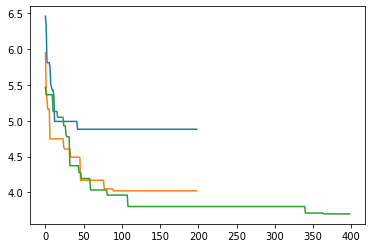

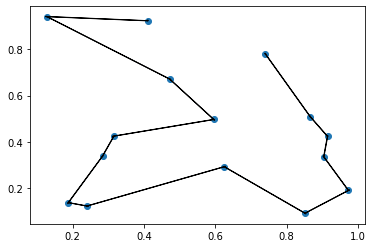

In [665]:
idx = 9
plt.plot(np.load(f"train_be/hard_train_curve_0.01_{n_terms}_pgd+k+20_constant_markov.npy")[idx])
plt.plot(np.load(f"train_be/hard_train_curve_0.01_{n_terms}_pgd+k+40_constant_markov.npy")[idx])
plt.plot(np.load(f"train_be/hard_train_curve_0.01_{n_terms}_pgd+k+80_constant_markov.npy")[idx])
points, perms, D = input_lst[idx]
tour_plot(tour_lst[idx], points)

Text(0.5, 1.0, 'Markov Weights Initialization')

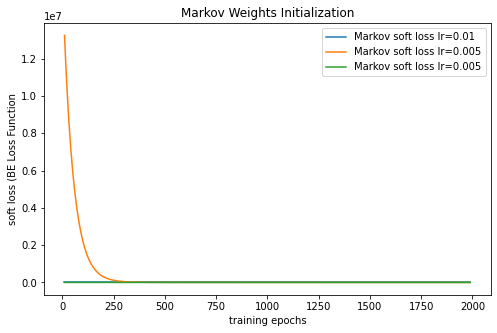

In [535]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_curve_1)
plt.plot(epochs, train_curve_1_r)
plt.plot(epochs, train_curve_1_m)
plt.xlabel("training epochs")
plt.ylabel("soft loss (BE Loss Function")
plt.legend(['Markov soft loss lr=0.01', 'Markov soft loss lr=0.005', 'Markov soft loss lr=0.005'])
plt.title("Markov Weights Initialization")

In [160]:
train_curve_1_h = np.mean(np.load("train_random/hard_train_curve_0.01_20_pgd_random.npy"), axis=0)
train_curve_2_h = np.mean(np.load("train_be_clean/hard_train_curve_0.01_20_pgd+k+3+noise_random_20.npy"), axis=0)
#train_curve_3_h = np.mean(np.load("train_random/hard_train_curve_0.01_20_pgd_qp.npy"), axis=0)

In [159]:
num_terms = 20
W_mst_lst = np.array(torch.load(f"cost_lst_{num_terms}_mst_random.pt")[:20])
cost_lst = np.array(torch.load(f"cost_lst_{num_terms}_random.pt")[:20])
data_lst = torch.load(f"data_lst_{num_terms}_random.pt")
tour_lst = torch.load(f"tour_lst_{num_terms}_random.pt")
dist_lst = torch.load(f"dist_lst_20_random.pt")

In [164]:
train_curve_2_h = train_curve_2_h[1:]

In [167]:
np.load("train_be_clean/hard_train_curve_0.01_20_pgd+k+3+noise_random_20.npy")

array([[0.   , 7.345, 6.819, ..., 0.   , 0.   , 0.   ],
       [0.   , 6.258, 6.258, ..., 0.   , 0.   , 0.   ],
       [0.   , 7.173, 7.173, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 6.648, 6.002, ..., 0.   , 0.   , 0.   ],
       [0.   , 5.89 , 5.89 , ..., 0.   , 0.   , 0.   ],
       [0.   , 6.527, 6.527, ..., 0.   , 0.   , 0.   ]])

Text(-1, 1.9947481399265625, '1.985')

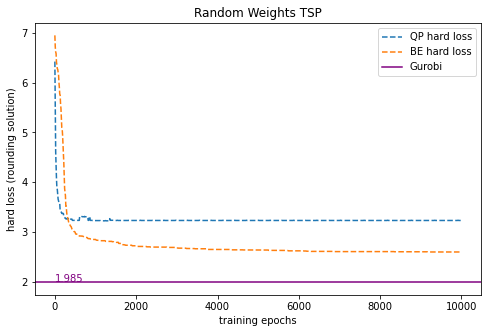

In [170]:
plt.figure(figsize=(8, 5))
epochs = [idx*10 for idx in range(999)]
plt.plot(epochs, train_curve_1_h, linestyle="dashed")
plt.plot(epochs, train_new, linestyle="dashed")
#plt.plot(epochs, train_curve_3_h, linestyle="dashed")
#plt.axhline(y = np.mean(W_mst_lst), color = "red")
plt.axhline(y = np.mean(cost_lst), color = "purple")
plt.xlabel("training epochs")
plt.ylabel("hard loss (rounding solution)")
plt.legend(['QP hard loss', 'BE hard loss', 'Gurobi'])
plt.title("Random Weights TSP")
#plt.text(-1, np.mean(W_mst_lst)+0.01, np.round(np.mean(W_mst_lst), 3), color = "red")
plt.text(-1, np.mean(cost_lst)+0.01, np.round(np.mean(cost_lst), 3), color = "purple")

In [856]:
tour = tour_lst[0]
distances = dist_lst[0]

In [857]:
P = torch.zeros(num_terms, num_terms)
for tour_idx in range(len(tour)):
    P[tour[tour_idx], tour_idx] = 1
tl = objective_function(P, distances, num_terms)

In [858]:
tl

tensor(2.876)

Text(0.5, 1.0, 'Comparison of weight initilization, n = 500 points')

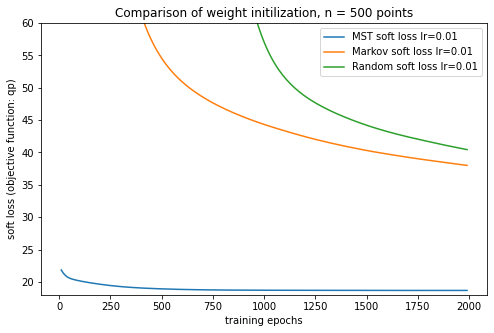

In [550]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_curve_1)
plt.plot(epochs, train_curve_1_m)
plt.plot(epochs, train_curve_1_r)
plt.ylim(18, 60)
plt.xlabel("training epochs")
plt.ylabel("soft loss (objective function: qp)")
plt.legend(['MST soft loss lr=0.01', 'Markov soft loss lr=0.01', 'Random soft loss lr=0.01'])
plt.title("Comparison of weight initilization, n = 500 points")

Text(-1, 3.841133322979797, '3.831')

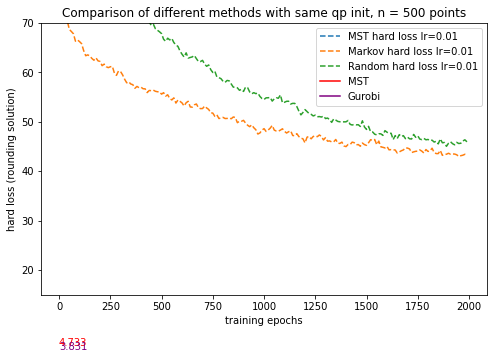

In [580]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_curve_1_h - 0.6, linestyle="dashed")
plt.plot(epochs, train_curve_1_h_m, linestyle="dashed")
plt.plot(epochs, train_curve_1_h_r, linestyle="dashed")
#plt.plot(epochs, np.mean(np.load("train_be/hard_train_curve_0.01_10_pgd_qp_softmax.npy"), axis=0), linestyle="dashed")
plt.axhline(y = np.mean(W_mst_lst), color = "red")
plt.axhline(y = np.mean(cost_lst[:100]), color = "purple")
plt.ylim(15, 70)
plt.xlabel("training epochs")
plt.ylabel("hard loss (rounding solution)")
plt.legend(['MST hard loss lr=0.01', 'Markov hard loss lr=0.01', 'Random hard loss lr=0.01', 'MST', 'Gurobi'])
plt.title("Comparison of different methods with same qp init, n = 500 points")
plt.text(-1, np.mean(W_mst_lst)+0.01, np.round(np.mean(W_mst_lst), 3), color = "red")
plt.text(-1, np.mean(cost_lst[:100])+0.01, np.round(np.mean(cost_lst[:100]), 3), color = "purple")

Text(0.5, 0, 'epochs')

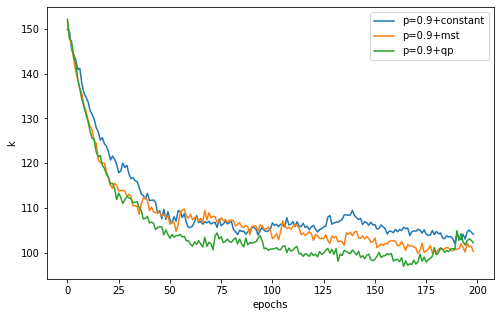

In [936]:
plt.figure(figsize=(8, 5))
file_lst = [
    "train_be/hashmap_size_0.01_15_pgd+p+0.8_constant_20.npy",
    "train_be/hashmap_size_0.01_15_pgd+p+0.8_mst_20.npy",
    "train_be/hashmap_size_0.01_15_pgd+p+0.8_qp_20.npy",
]
for file in file_lst:
    num_P = np.mean(np.load(file), axis=0)
    #num_P = [(num_P[idx+1] - num_P[idx]) for idx in range(len(num_P) - 1)]
    plt.plot(num_P[:, 1])

plt.legend(['p=0.9+constant', 'p=0.9+mst', 'p=0.9+qp'])
plt.ylabel("k")
plt.xlabel("epochs")

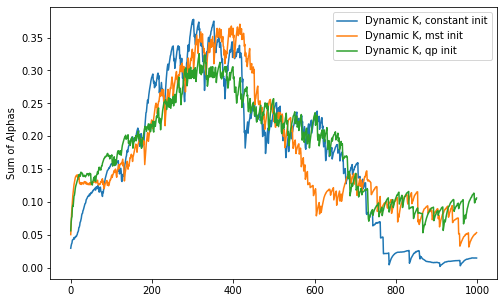

In [228]:
plt.figure(figsize=(8, 5))
file_lst = [
    "train_be_clean/hashmap_size_0.01_20_pgd+k+3+noise_constant_20.npy",
    "train_be_clean/hashmap_size_0.01_20_pgd+k+3+noise_mst_20.npy",
    "train_be_clean/hashmap_size_0.01_20_pgd+k+3+noise_qp_20.npy"
]
for file in file_lst:
    num_P = np.mean(np.load(file), axis=0)[1:]
    #num_P = [(num_P[idx+1] - num_P[idx]) for idx in range(len(num_P) - 1)]
    plt.plot(num_P[:, 2])

plt.ylabel("Sum of Alphas")
plt.legend(['Dynamic K, constant init', 'Dynamic K, mst init', 'Dynamic K, qp init', 'p=0.8'])

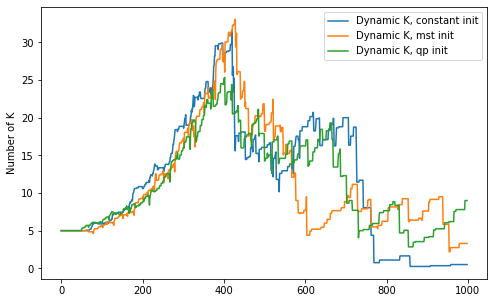

In [229]:
plt.figure(figsize=(8, 5))
file_lst = [
    "train_be_clean/hashmap_size_0.01_20_pgd+k+3+noise_constant_20.npy",
    "train_be_clean/hashmap_size_0.01_20_pgd+k+3+noise_mst_20.npy",
    "train_be_clean/hashmap_size_0.01_20_pgd+k+3+noise_qp_20.npy"
]
for file in file_lst:
    num_P = np.mean(np.load(file), axis=0)[1:]
    plt.plot(num_P[:, 1])

plt.ylabel("Number of K")
plt.legend(['Dynamic K, constant init', 'Dynamic K, mst init', 'Dynamic K, qp init', 'p=0.8'])

In [518]:
file = "train_be/hashmap_size_0.01_15_pgd+p+0.8_constant_markov.npy"

In [519]:
num_P = np.mean(np.load(file), axis=0)